# Semana 3 do Aceleradev DS Codenation

## Professor: Túlio Vieira de Souza | Tema: Análise Exploratória

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("~/projetos_python/aceleradev/Data-Science-Online/Semana 3/houses_to_rent_v2.csv")

In [3]:
df1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [14]:
df1.rename(columns={"rent amount (R$)": "valor_aluguel"}, inplace= True)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   valor_aluguel        10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Analisando os tipos de dados, podemos "enxugar" um pouco esse *df* mudando os tipos primitivos.

**Coluna "floor"**

In [24]:
df1['floor'].value_counts()

-      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
46        1
35        1
51        1
301       1
Name: floor, dtype: int64

Agora sabemos porque essa coluna é classificada como *object* sendo que seus valores são majoritariamente *int*, tem registros preenchidos com "-" para simbilizar **ausência de andares**. E para resolver isso, basta substituir o seu valor por um 0

In [25]:
df1['floor'].replace('-', 0, inplace=True)

In [38]:
df1['floor'].value_counts()

0      2461
1      1081
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
46        1
51        1
35        1
301       1
Name: floor, dtype: int64

Agora, podemos tornar essa coluna um tipo numérico, e também mudar a quantidade de memória gastas em outras, pois tem colunas em *int64* que não precisam de toda esse armazenamento

In [48]:
df_lite = df1.astype({'area': 'uint16', 'rooms': 'uint16', 'bathroom': 'uint16', 'parking spaces': 'uint16', 'floor': 'uint16', 'hoa (R$)': 'uint16', 'valor_aluguel': 'uint16', 'property tax (R$)': 'uint16', 'fire insurance (R$)': 'uint16', 'total (R$)': 'uint16'}, copy=True)
df_lite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  uint16
 2   rooms                10692 non-null  uint16
 3   bathroom             10692 non-null  uint16
 4   parking spaces       10692 non-null  uint16
 5   floor                10692 non-null  uint16
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  uint16
 9   valor_aluguel        10692 non-null  uint16
 10  property tax (R$)    10692 non-null  uint16
 11  fire insurance (R$)  10692 non-null  uint16
 12  total (R$)           10692 non-null  uint16
dtypes: object(3), uint16(10)
memory usage: 459.5+ KB


Como podemos perceber, nesse *dataframe* nao existem valores nulos, basta comparar **RangeIndex** com **Non-Null Count**. Eles são iguais. Mas se quiser, basta conferir com o método .isna()

In [49]:
df_lite.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
valor_aluguel          0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

**Primeira Coisa:** Definir o que vamos trabalhar. No caso desse *df*, analisaremos o valor do aluguel

**Segunda Coisa:** fazer uma análise **UNIVARIÁVEL** no que estamos analisando

In [15]:
df1["valor_aluguel"].mean()

3896.247194163861

In [17]:
df1['valor_aluguel'].median()

2661.0

In [19]:
df1['valor_aluguel'].std()

3408.5455176710675

In [20]:
df1['valor_aluguel'].mode()

0    2500
dtype: int64

Para resumir

In [52]:
df_lite['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

**Repare:** Olhando os quartis, de 75% ao *max*, o valor do aluguel cresceu 9 vezes, enquanto que do min aos 25%, cresceu apenas 3.4 vezes. Diante disso, podem ser que existam *outliers*

In [63]:
df_lite['valor_aluguel'].value_counts(bins=9)

(405.449, 5400.0]     8252
(5400.0, 10350.0]     1728
(10350.0, 15300.0]     699
(15300.0, 20250.0]       9
(20250.0, 25200.0]       2
(40050.0, 45000.0]       1
(25200.0, 30150.0]       1
(35100.0, 40050.0]       0
(30150.0, 35100.0]       0
Name: valor_aluguel, dtype: int64

Agora, sabemos onde estes valores estão concentrados, basta olhar os intervalos de classes e suas frequências absolutas. Mas para ver essa informação **graficamente**

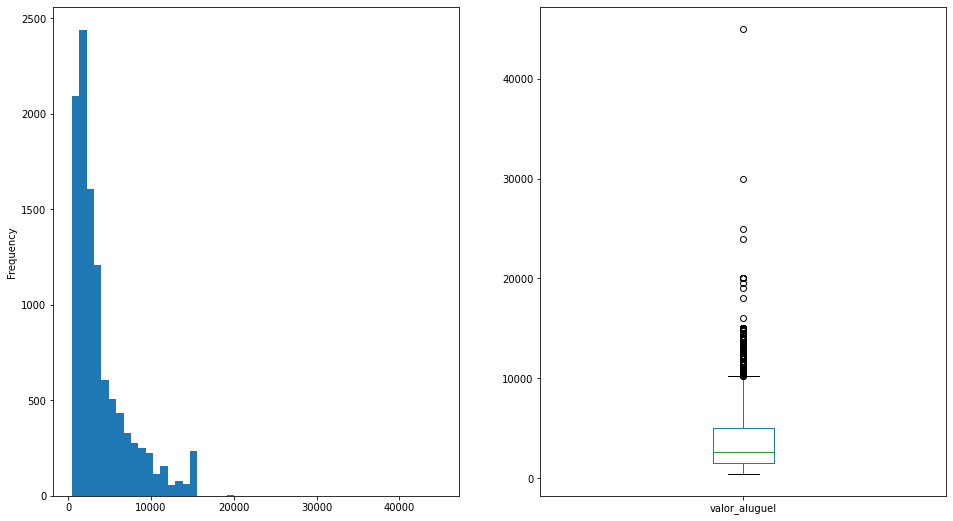

In [81]:
figure, (g1, g2) = plt.subplots(1, 2, figsize=(16,9))
df_lite['valor_aluguel'].plot(kind='hist', bins=50, ax=g1);
df_lite['valor_aluguel'].plot(kind='box', ax=g2);